In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

%matplotlib inline

In [47]:
!pip install plotly
!pip install cufflinks

In [55]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
school = pd.read_csv("data/school_report_ver2.csv", encoding='cp949')
school.head()

,성별,전공,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,취미,일평균학습시간,집중공부시간,기대연봉,전공만족여부,전공관련취업선호도,일평균소셜미디어사용시간,통학시간,학업스트레스,교우관계스트레스,아르바이트여부,방과후수업여부
0,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,나쁨,나쁨,No,No
1,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,나쁨,나쁨,No,No
2,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,끔찍함,나쁨,No,Yes
3,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,나쁨,좋음,No,Yes
4,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,좋음,좋음,No,No


In [4]:
school.columns

Index(['성별', '전공', '신장', '몸무게', '1학년평균성적', '2학년평균성적', '3학년평균성적', '취미',
       '일평균학습시간', '집중공부시간', '기대연봉', '전공만족여부', '전공관련취업선호도', '일평균소셜미디어사용시간',
       '통학시간', '학업스트레스', '교우관계스트레스', '아르바이트여부', '방과후수업여부'],
      dtype='object')

In [5]:
school.shape

(235, 19)

In [52]:
school.isnull().sum()

성별              0
전공              0
신장              0
몸무게             0
1학년평균성적         0
2학년평균성적         0
3학년평균성적         0
취미              0
일평균학습시간         0
집중공부시간          0
기대연봉            0
전공만족여부          0
전공관련취업선호도       0
일평균소셜미디어사용시간    0
통학시간            0
학업스트레스          0
교우관계스트레스        0
아르바이트여부         0
방과후수업여부         0
dtype: int64

In [53]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   성별            235 non-null    object 
 1   전공            235 non-null    object 
 2   신장            235 non-null    float64
 3   몸무게           235 non-null    float64
 4   1학년평균성적       235 non-null    float64
 5   2학년평균성적       235 non-null    float64
 6   3학년평균성적       235 non-null    float64
 7   취미            235 non-null    object 
 8   일평균학습시간       235 non-null    object 
 9   집중공부시간        235 non-null    object 
 10  기대연봉          235 non-null    int64  
 11  전공만족여부        235 non-null    object 
 12  전공관련취업선호도     235 non-null    object 
 13  일평균소셜미디어사용시간  235 non-null    object 
 14  통학시간          235 non-null    object 
 15  학업스트레스        235 non-null    object 
 16  교우관계스트레스      235 non-null    object 
 17  아르바이트여부       235 non-null    object 
 18  방과후수업여부       235 non-null    

In [54]:
school.describe()

,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,기대연봉
count,235.000000,235.000000,235.000000,235.000000,235.000000,2.350000e+02
mean,157.402128,60.803830,76.842128,68.780128,70.660553,3.248168e+04
std,21.510805,14.895844,13.050800,11.016533,15.727446,1.113146e+05
min,4.500000,20.000000,7.400000,45.000000,1.000000,0.000000e+00
25%,152.000000,50.000000,70.000000,60.000000,60.000000,1.500000e+04
50%,160.000000,60.000000,80.000000,69.000000,70.000000,2.000000e+04
75%,170.000000,70.000000,86.250000,76.000000,80.000000,2.500000e+04
max,192.000000,106.000000,98.000000,94.000000,100.000000,1.500000e+06


<AxesSubplot:title={'center':'학년별 학교 성적'}, xlabel='학년', ylabel='성적'>

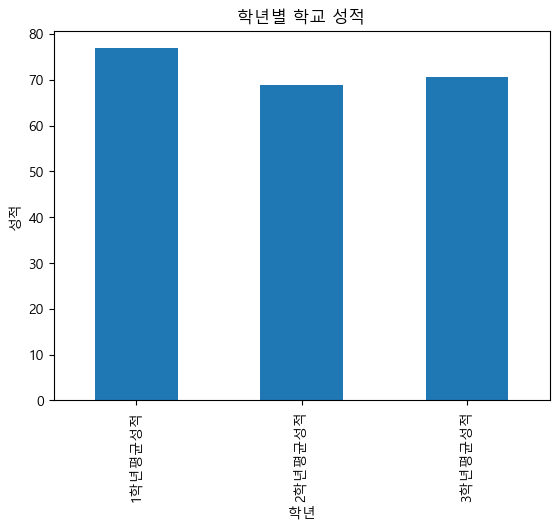

In [55]:
school[['1학년평균성적','2학년평균성적','3학년평균성적']].mean().plot(kind='bar',xlabel="학년",ylabel="성적",title="학년별 학교 성적")

In [56]:
school['성별'].value_counts()

Male      156
Female     79
Name: 성별, dtype: int64

In [57]:
df=school[['1학년평균성적','2학년평균성적','3학년평균성적']].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   1학년평균성적  235 non-null    int32
 1   2학년평균성적  235 non-null    int32
 2   3학년평균성적  235 non-null    int32
dtypes: int32(3)
memory usage: 2.9 KB


In [8]:
male=school[school['성별'] =='Male'].sample(n=79) #random sampling
male

,성별,전공,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,취미,일평균학습시간,집중공부시간,기대연봉,전공만족여부,전공관련취업선호도,일평균소셜미디어사용시간,통학시간,학업스트레스,교우관계스트레스,아르바이트여부,방과후수업여부
115,Male,BCA,150.0,65.0,85.0,50.00,70.00,Video Games,30 - 60 minute,Anytime,25000,Yes,75%,1.30 - 2 hour,0 - 30 minutes,나쁨,나쁨,No,No
151,Male,BCA,175.0,76.0,61.8,68.30,66.30,Sports,2 - 3 hour,Morning,30000,Yes,50%,30 - 60 Minute,1.30 - 2 hour,좋음,좋음,No,No
168,Male,Commerce,169.0,65.0,90.0,80.00,85.00,Cinema,3 - 4 hour,Anytime,20000,Yes,75%,1.30 - 2 hour,more than 3 hour,좋음,좋음,No,Yes
136,Male,BCA,134.0,40.0,91.4,65.50,82.96,Cinema,0 - 30 minute,Morning,20000,Yes,75%,More than 2 hour,30 - 60 minutes,좋음,좋음,No,Yes
44,Male,Commerce,160.0,65.0,70.0,75.00,70.00,Sports,0 - 30 minute,Anytime,20000,Yes,75%,1 - 1.30 hour,30 - 60 minutes,좋음,좋음,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Male,BCA,152.0,43.0,61.6,61.67,75.00,Sports,1 - 2 Hour,Morning,25000,Yes,50%,1 - 1.30 hour,1 - 1.30 hour,좋음,좋음,No,No
159,Male,Commerce,165.0,75.0,65.0,75.00,97.00,Cinema,0 - 30 minute,Anytime,15000,Yes,50%,1 - 1.30 hour,0 - 30 minutes,너무 좋음,좋음,Yes,Yes
50,Male,B.com Accounting and Finance,153.0,56.0,62.0,53.00,80.00,Sports,1 - 2 Hour,Morning,50000,Yes,75%,30 - 60 Minute,2 - 2.30 hour,끔찍함,끔찍함,Yes,Yes
220,Male,Commerce,160.0,60.0,85.0,80.00,80.00,Cinema,30 - 60 minute,Anytime,20000,Yes,100%,1 - 30 Minute,30 - 60 minutes,끔찍함,나쁨,No,Yes


In [9]:
female = school[school['성별']=='Female']
female

,성별,전공,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,취미,일평균학습시간,집중공부시간,기대연봉,전공만족여부,전공관련취업선호도,일평균소셜미디어사용시간,통학시간,학업스트레스,교우관계스트레스,아르바이트여부,방과후수업여부
1,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,나쁨,나쁨,No,No
3,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,나쁨,좋음,No,Yes
5,Female,BCA,139.0,33.0,90.0,75.0,70.0,Cinema,30 - 60 minute,Night,20000,Yes,50%,30 - 60 Minute,0 - 30 minutes,나쁨,좋음,No,Yes
11,Female,BCA,152.0,51.0,60.0,55.0,65.0,Cinema,2 - 3 hour,Night,20000,Yes,75%,1 - 1.30 hour,2 - 2.30 hour,나쁨,나쁨,No,No
12,Female,BCA,158.0,64.0,59.0,54.0,80.0,Reading books,30 - 60 minute,Morning,18000,Yes,75%,1 - 30 Minute,30 - 60 minutes,나쁨,좋음,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Female,Commerce,167.0,65.0,93.0,85.0,90.0,Reading books,1 - 2 Hour,Night,15000,Yes,75%,30 - 60 Minute,30 - 60 minutes,좋음,좋음,No,Yes
229,Female,B.com ISM,153.0,60.0,60.0,70.0,70.0,Sports,1 - 2 Hour,Anytime,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,좋음,나쁨,No,No
232,Female,BCA,139.0,33.0,90.0,75.0,70.0,Cinema,30 - 60 minute,Night,20000,Yes,50%,30 - 60 Minute,2.30 - 3 hour,나쁨,좋음,No,Yes
233,Female,Commerce,153.0,58.0,85.0,74.0,75.0,Cinema,0 - 30 minute,Anytime,20000,Yes,75%,More than 2 hour,2.30 - 3 hour,끔찍함,좋음,No,Yes


In [10]:
new_df=pd.concat([male, female])
new_df.head(100)

,성별,전공,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,취미,일평균학습시간,집중공부시간,기대연봉,전공만족여부,전공관련취업선호도,일평균소셜미디어사용시간,통학시간,학업스트레스,교우관계스트레스,아르바이트여부,방과후수업여부
115,Male,BCA,150.0,65.0,85.0,50.0,70.00,Video Games,30 - 60 minute,Anytime,25000,Yes,75%,1.30 - 2 hour,0 - 30 minutes,나쁨,나쁨,No,No
151,Male,BCA,175.0,76.0,61.8,68.3,66.30,Sports,2 - 3 hour,Morning,30000,Yes,50%,30 - 60 Minute,1.30 - 2 hour,좋음,좋음,No,No
168,Male,Commerce,169.0,65.0,90.0,80.0,85.00,Cinema,3 - 4 hour,Anytime,20000,Yes,75%,1.30 - 2 hour,more than 3 hour,좋음,좋음,No,Yes
136,Male,BCA,134.0,40.0,91.4,65.5,82.96,Cinema,0 - 30 minute,Morning,20000,Yes,75%,More than 2 hour,30 - 60 minutes,좋음,좋음,No,Yes
44,Male,Commerce,160.0,65.0,70.0,75.0,70.00,Sports,0 - 30 minute,Anytime,20000,Yes,75%,1 - 1.30 hour,30 - 60 minutes,좋음,좋음,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,Female,Commerce,159.0,67.0,98.0,80.0,85.00,Reading books,1 - 2 Hour,Anytime,15000,Yes,100%,1.30 - 2 hour,more than 3 hour,좋음,나쁨,No,Yes
54,Female,Commerce,180.0,43.0,86.0,78.0,85.00,Reading books,1 - 2 Hour,Anytime,10000,Yes,75%,1.30 - 2 hour,30 - 60 minutes,나쁨,좋음,No,Yes
56,Female,Commerce,156.0,52.0,82.0,70.0,80.00,Reading books,2 - 3 hour,Morning,15000,Yes,100%,1 - 30 Minute,0 - 30 minutes,너무 좋음,나쁨,Yes,Yes
57,Female,Commerce,167.0,62.0,80.0,60.0,60.00,Sports,1 - 2 Hour,Morning,18000,Yes,75%,1 - 1.30 hour,1 - 1.30 hour,좋음,좋음,No,Yes


<AxesSubplot:title={'center':'학년별 학교 성적'}, xlabel='학년', ylabel='성적'>

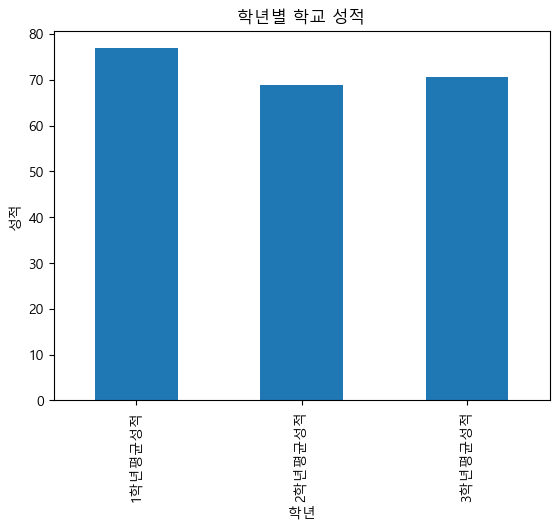

In [13]:
school[['1학년평균성적','2학년평균성적','3학년평균성적']].mean().plot(kind='bar',xlabel="학년",ylabel="성적",title="학년별 학교 성적")

In [11]:
new_df = pd.melt(new_df, id_vars = ["성별"],value_vars = ['1학년평균성적','2학년평균성적','3학년평균성적'])

In [15]:
new_df

,성별,variable,value
0,Male,1학년평균성적,88.0
1,Male,1학년평균성적,85.6
2,Male,1학년평균성적,85.0
3,Male,1학년평균성적,65.0
4,Male,1학년평균성적,84.0
...,...,...,...
469,Female,3학년평균성적,90.0
470,Female,3학년평균성적,70.0
471,Female,3학년평균성적,70.0
472,Female,3학년평균성적,75.0


(0.0, 100.0)

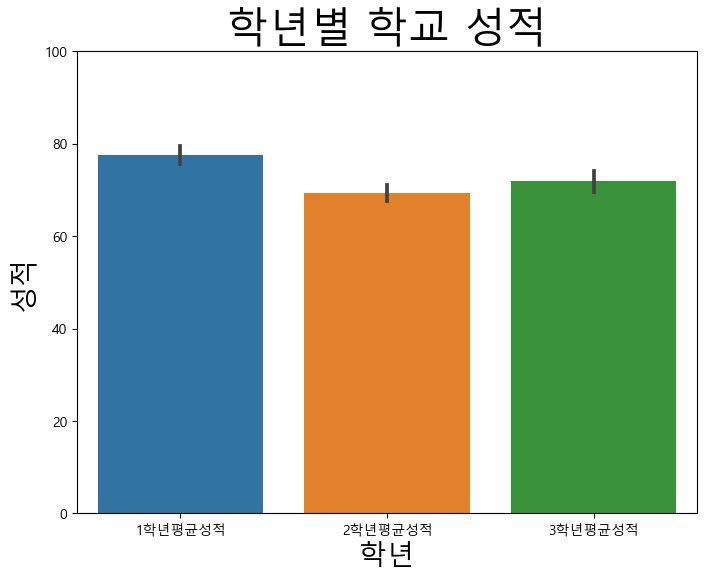

In [90]:
plt.figure(figsize = (8,6))

sns.barplot(data=new_df,x='variable',y='value')
plt.xlabel('학년',fontsize=20)
plt.ylabel('성적',fontsize=20)
plt.title('학년별 학교 성적',fontsize = 30)
plt.ylim(0,100)

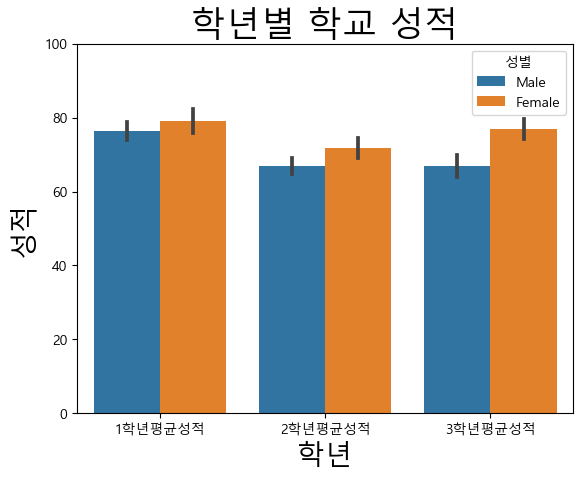

In [83]:
sns.barplot(data=new_df,x='variable',y='value',hue='성별')
plt.xlabel('학년',fontsize=20)
plt.ylabel('성적',fontsize=20)
plt.title('학년별 학교 성적',fontsize = 25)
plt.ylim(0,100)
plt.show()

In [12]:
school

,성별,전공,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,취미,일평균학습시간,집중공부시간,기대연봉,전공만족여부,전공관련취업선호도,일평균소셜미디어사용시간,통학시간,학업스트레스,교우관계스트레스,아르바이트여부,방과후수업여부
0,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,나쁨,나쁨,No,No
1,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,나쁨,나쁨,No,No
2,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,끔찍함,나쁨,No,Yes
3,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,나쁨,좋음,No,Yes
4,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,좋음,좋음,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Male,B.com ISM,170.0,76.0,72.0,67.0,65.0,Video Games,30 - 60 minute,Morning,7000,Yes,50%,More than 2 hour,30 - 60 minutes,나쁨,나쁨,No,Yes
231,Male,B.com ISM,172.0,52.0,72.0,70.0,76.0,Cinema,2 - 3 hour,Anytime,25000,Yes,75%,30 - 60 Minute,30 - 60 minutes,좋음,좋음,No,Yes
232,Female,BCA,139.0,33.0,90.0,75.0,70.0,Cinema,30 - 60 minute,Night,20000,Yes,50%,30 - 60 Minute,2.30 - 3 hour,나쁨,좋음,No,Yes
233,Female,Commerce,153.0,58.0,85.0,74.0,75.0,Cinema,0 - 30 minute,Anytime,20000,Yes,75%,More than 2 hour,2.30 - 3 hour,끔찍함,좋음,No,Yes


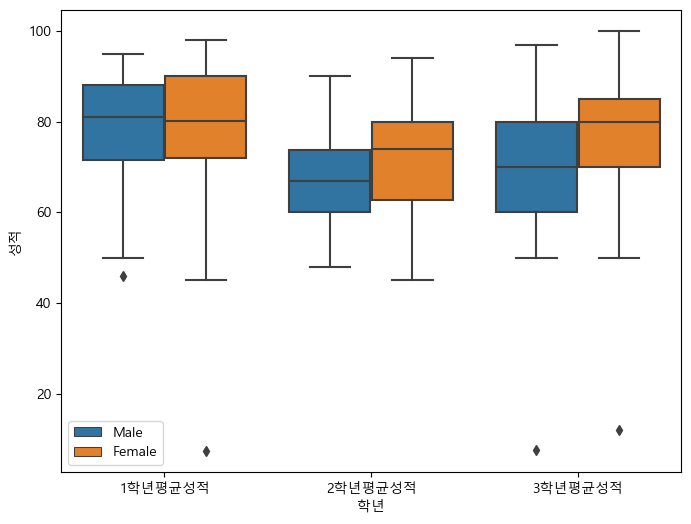

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='variable',y='value',data = new_df, hue = '성별', dodge = True)
plt.xlabel('학년')
plt.legend()
plt.ylabel('성적')
plt.show()

<AxesSubplot:xlabel='variable', ylabel='value'>

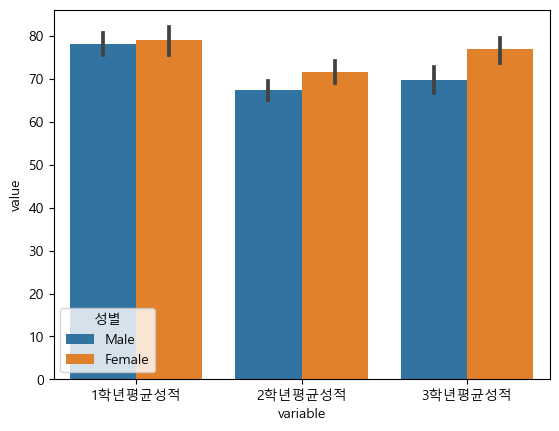

In [18]:
sns.barplot(x ='variable',y='value',data=new_df,hue='성별')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0 - 30 minute'),
  Text(1, 0, '30 - 60 minute'),
  Text(2, 0, '1 - 2 Hour'),
  Text(3, 0, '2 - 3 hour'),
  Text(4, 0, '3 - 4 hour'),
  Text(5, 0, 'More Than 4 hour')])

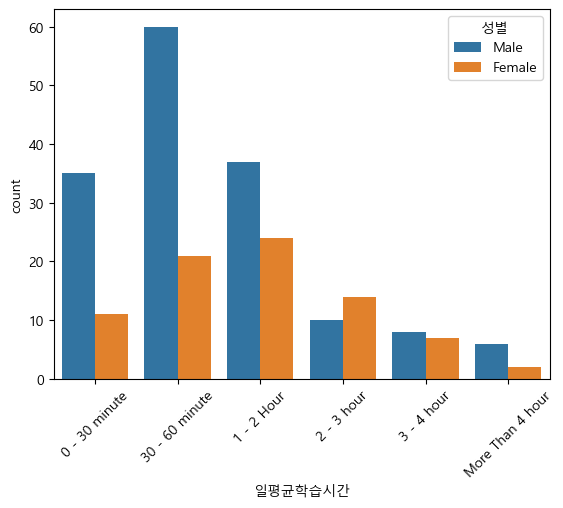

In [21]:
#plt.figure(figsize=(10, 6))
sns.countplot(data=school, x="일평균학습시간", hue="성별")
plt.xticks(rotation=45, fontsize=10)

In [37]:
school.groupby('성별')['일평균학습시간'].value_counts().sort_index()

성별      일평균학습시간         
Female  0 - 30 minute       11
        1 - 2 Hour          24
        2 - 3 hour          14
        3 - 4 hour           7
        30 - 60 minute      21
        More Than 4 hour     2
Male    0 - 30 minute       35
        1 - 2 Hour          37
        2 - 3 hour          10
        3 - 4 hour           8
        30 - 60 minute      60
        More Than 4 hour     6
Name: 일평균학습시간, dtype: int64

In [31]:
school.groupby(['일평균학습시간','성별']).count()

전공  신장  몸무게  1학년평균성적  2학년평균성적  3학년평균성적  취미  집중공부시간  \
일평균학습시간          성별                                                           
0 - 30 minute    Female  11  11   11       11       11       11  11      11   
                 Male    35  35   35       35       35       35  35      35   
1 - 2 Hour       Female  24  24   24       24       24       24  24      24   
                 Male    37  37   37       37       37       37  37      37   
2 - 3 hour       Female  14  14   14       14       14       14  14      14   
                 Male    10  10   10       10       10       10  10      10   
3 - 4 hour       Female   7   7    7        7        7        7   7       7   
                 Male     8   8    8        8        8        8   8       8   
30 - 60 minute   Female  21  21   21       21       21       21  21      21   
                 Male    60  60   60       60       60       60  60      60   
More Than 4 hour Female   2   2    2        2        2        2   2       2   
                 Male     6   6    6        6        6        6   6       6   

                         기대연봉  전공만족여부  전공관련취업선호도  일평균소셜미디어사용시간  통학시간  학업스트레스  \
일평균학습시간          성별                                                            
0 - 30 minute    Female    11      11         11            11    11      11   
                 Male      35      35         35            35    35      35   
1 - 2 Hour       Female    24      24         24            24    24      24   
                 Male      37      37         37            37    37      37   
2 - 3 hour       Female    14      14         14            14    14      14   
                 Male      10      10         10            10    10      10   
3 - 4 hour       Female     7       7          7             7     7       7   
                 Male       8       8          8             8     8       8   
30 - 60 minute   Female    21      21         21            21    21      21   
                 Male      60      60         60            60    60      60   
More Than 4 hour Female     2       2          2             2     2       2   
                 Male       6       6          6             6     6       6   

                         교우관계스트레스  아르바이트여부  방과후수업여부  
일평균학습시간          성별                                  
0 - 30 minute    Female        11       11       11  
                 Male          35       35       35  
1 - 2 Hour       Female        24       24       24  
                 Male          37       37       37  
2 - 3 hour       Female        14       14       14  
                 Male          10       10       10  
3 - 4 hour       Female         7        7        7  
                 Male           8        8        8  
30 - 60 minute   Female        21       21       21  
                 Male          60       60       60  
More Than 4 hour Female         2        2        2  
                 Male           6        6        6

In [20]:
studingTimeMale = male['일평균학습시간']
studingTimeFemale = female['일평균학습시간']


studingTimeMale = pd.DataFrame(studingTimeMale.value_counts())
studingTimeMale['index'] = studingTimeMale.index
studingTimeMale.index = [x for x in range(0,6)]
print(studingTimeMale)

   일평균학습시간             index
0       33    30 - 60 minute
1       18        1 - 2 Hour
2       16     0 - 30 minute
3        5        2 - 3 hour
4        4        3 - 4 hour
5        3  More Than 4 hour


In [41]:
STMale = male["일평균학습시간"]
STFMale = female["일평균학습시간"]

STMale = pd.DataFrame(STMale.value_counts())
STMale['index'] = STMale.index
STMale.index=[x for x in range(0,6)]

STFMale = pd.DataFrame(STFMale.value_counts())
STFMale['index'] = STFMale.index
STFMale.index=[x for x in range(0,6)]

print(STMale)
print(STFMale)

   일평균학습시간             index
0       33    30 - 60 minute
1       18        1 - 2 Hour
2       16     0 - 30 minute
3        5        2 - 3 hour
4        4        3 - 4 hour
5        3  More Than 4 hour
   일평균학습시간             index
0       24        1 - 2 Hour
1       21    30 - 60 minute
2       14        2 - 3 hour
3       11     0 - 30 minute
4        7        3 - 4 hour
5        2  More Than 4 hour


In [42]:
fig = make_subplots(rows=1 , cols=2, specs=[[{"type":"domain"},{"type":"domain"}]])

fig.add_trace(go.Pie(labels=STMale["index"],
                    values=STMale["일평균학습시간"]),1,1)
fig.add_trace(go.Pie(labels=STFMale["index"],
                    values=STFMale["일평균학습시간"]),1,2)
fig.update_traces(hole=.4, hoverinfo="label+percent")
fig.update_layout(
    title_text="Male vs Female",
    annotations =  [dict(text='Male', x=0.15, y=0.5, font_size=20, showarrow=False),
                    dict(text="Female", x=0.85, y=0.5, font_size=15, showarrow=False)]
    # annotations = 주석
)
fig.show()

In [43]:
STMale = male["일평균소셜미디어사용시간"]
STFMale = female["일평균소셜미디어사용시간"]

STMale = pd.DataFrame(STMale.value_counts())
STMale['index'] = STMale.index
STMale.index=[x for x in range(0,6)]

STFMale = pd.DataFrame(STFMale.value_counts())
STFMale['index'] = STFMale.index
STFMale.index=[x for x in range(0,6)]

print(STMale)
print(STFMale)

   일평균소셜미디어사용시간             index
0            20    30 - 60 Minute
1            20     1 - 1.30 hour
2            15     1 - 30 Minute
3            12     1.30 - 2 hour
4            11  More than 2 hour
5             1          0 Minute
   일평균소셜미디어사용시간             index
0            24    30 - 60 Minute
1            21     1 - 1.30 hour
2            14     1 - 30 Minute
3            10  More than 2 hour
4             8     1.30 - 2 hour
5             2          0 Minute


In [52]:
fig = make_subplots(rows=1 , cols=2, specs=[[{"type":"domain"},{"type":"domain"}]])

fig.add_trace(go.Pie(labels=STMale["index"],
                    values=STMale["일평균소셜미디어사용시간"]),1,1)
fig.add_trace(go.Pie(labels=STFMale["index"],
                    values=STFMale["일평균소셜미디어사용시간"]),1,2)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
title_text="남학생과 여학생의 일편균 소셜미디어 사용시간 비교",title_x = 0.5,font = dict(size = 15),
annotations =  [dict(text='Male', x=0.17, y=0.5, font_size=20, showarrow=False),
                    dict(text="Female", x=0.85, y=0.5, font_size=20, showarrow=False)]
    # annotations = 주석
)
fig.show()

In [56]:
jsysoo = pd.read_csv("Data/대회 설문조사지.csv",encoding='cp949')

In [57]:
jsysoo

,타임스탬프,학년,성별,학과(전공),취미,평균 공부 시간,공부하는 시간,자격증 개수,출석,평균 수면 시간,...,희망 연봉,학과 만족 O/X,취업 선호도,소셜 미디어 사용시간,통학 시간,학업 스트레스,교우관계,알바 유무,방과후 유무,방과후 만족도
0,2023. 10. 12 오후 12:21:46,2학년,남자,창업마케팅과,운동,1시간-2시간,방과후(저녁),4,절대 안빠지죠,6시간 이상 자요,...,3000,O,5,1시간-2시간,10-30분,2,3,X,O(아래 질문에 답변해주세요!),8.0
1,2023. 10. 12 오후 12:21:49,2학년,남자,창업마케팅과,게임,0-30분,기타,4,반년에 한두번 빠져요,4~6시간 자요,...,2000,O,5,2시간-3시간 이상,10-30분,3,2,X,O(아래 질문에 답변해주세요!),5.0
2,2023. 10. 12 오후 12:23:07,3학년,남자,소프트웨어개발과,게임,0-30분,기타,6,절대 안빠지죠,6시간 이상 자요,...,3000,O,7,1시간-2시간,10-30분,2,1,X,X,NaN
3,2023. 10. 12 오후 12:23:25,3학년,남자,소프트웨어개발과,게임,0-30분,밤,5,절대 안빠지죠,4~6시간 자요,...,3000,O,5,0-30분,10-30분,3,1,X,X,1.0
4,2023. 10. 12 오후 12:23:28,2학년,남자,창업마케팅과,음악,0-30분,기타,6,한달에 한두번 빠져요,2~4시간 자요,...,?,O,5,2시간-3시간 이상,1시간-2시간,1,1,O,X,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2023. 10. 17 오후 3:24:40,2학년,남자,스마트웹콘텐츠과,게임,0-30분,방과후(저녁),4,한달에 한두번 이상 빠져요,6시간 이상 자요,...,4000,O,7,2시간-3시간 이상,10-30분,3,1,X,X,NaN
283,2023. 10. 17 오후 3:27:17,2학년,남자,스마트웹콘텐츠과,게임,0-30분,방과후(저녁),4,절대 안빠지죠,6시간 이상 자요,...,?,O,5,2시간-3시간 이상,10-30분,3,1,X,X,1.0
284,2023. 10. 17 오후 3:27:41,2학년,남자,스마트웹콘텐츠과,운동,2시간-3시간 이상,방과후(저녁),4,절대 안빠지죠,4~6시간 자요,...,?,O,4,1시간-2시간,30-1시간,3,1,X,O(아래 질문에 답변해주세요!),8.0
285,2023. 10. 17 오후 3:28:23,2학년,남자,스마트웹콘텐츠과,운동,30분-1시간,밤,2,한달에 한두번 빠져요,6시간 이상 자요,...,5000,O,5,1시간-2시간,30-1시간,3,3,O,X,NaN


In [71]:
male = jsysoo[jsysoo["성별"]=="남자"].sample(n=97)
female = jsysoo[jsysoo["성별"]=="여자"]


sleepingtimeMale=male["평균 수면 시간"]
sleepingtimeFemale=female["평균 수면 시간"]

sleepingtimeMale = pd.DataFrame(sleepingtimeMale.value_counts())
sleepingtimeMale['index'] = sleepingtimeMale.index
sleepingtimeMale.index = [x for x in range(0,4)]
sleepingtimeFemale = pd.DataFrame(sleepingtimeFemale.value_counts())
sleepingtimeFemale['index'] = sleepingtimeFemale.index
sleepingtimeFemale.index = [x for x in range(0,3)]

fig = make_subplots(rows=1 , cols=2, specs=[[{"type":"domain"},{"type":"domain"}]])

fig.add_trace(go.Pie(labels=sleepingtimeMale["index"],
                    values=sleepingtimeMale["평균 수면 시간"]),1,1)
fig.add_trace(go.Pie(labels=sleepingtimeFemale["index"],
                    values=sleepingtimeFemale["평균 수면 시간"]),1,2)
fig.update_traces(hole=.4, hoverinfo="label+percent")
fig.update_layout(
    title_text="남학생과 여학생의 평균 수면 시간 비교",
# legend=dict(title_font_family = "Times New Roman", font=dict(size=23))
    title_x=0.5, font=dict(size=15),
    annotations =  [dict(text='Male', x=0.18, y=0.5, font_size=20, showarrow=False),
                    dict(text="Female", x=0.85, y=0.5, font_size=15, showarrow=False)]
    # annotations = 주석
)
fig.show()

In [79]:
male = jsysoo[jsysoo["성별"]=="남자"].sample(n=97)
female = jsysoo[jsysoo["성별"]=="여자"]


sleepingtimeMale=male["출석"]
sleepingtimeFemale=female["출석"]

sleepingtimeMale = pd.DataFrame(sleepingtimeMale.value_counts())
sleepingtimeMale['index'] = sleepingtimeMale.index
sleepingtimeMale.index = [x for x in range(0,5)]
sleepingtimeFemale = pd.DataFrame(sleepingtimeFemale.value_counts())
sleepingtimeFemale['index'] = sleepingtimeFemale.index
sleepingtimeFemale.index = [x for x in range(0,5)]

fig = make_subplots(rows=1 , cols=2, specs=[[{"type":"domain"},{"type":"domain"}]])

fig.add_trace(go.Pie(labels=sleepingtimeMale["index"],
                    values=sleepingtimeMale["출석"]),1,1)
fig.add_trace(go.Pie(labels=sleepingtimeFemale["index"],
                    values=sleepingtimeFemale["출석"]),1,2)
fig.update_traces(hole=.4, hoverinfo="label+percent")
fig.update_layout(
    title_text="남학생과 여학생의 출석 비교",
# legend=dict(title_font_family = "Times New Roman", font=dict(size=23))
    title_x=0.5, font=dict(size=15),
    annotations =  [dict(text='Male', x=0.185, y=0.5, font_size=20, showarrow=False),
                    dict(text="Female", x=0.835, y=0.5, font_size=20, showarrow=False)]
    # annotations = 주석
)
fig.show()

In [82]:
male = jsysoo[jsysoo["성별"]=="남자"].sample(n=97)
female = jsysoo[jsysoo["성별"]=="여자"]


sleepingtimeMale=male["통학 시간"]
sleepingtimeFemale=female["통학 시간"]

sleepingtimeMale = pd.DataFrame(sleepingtimeMale.value_counts())
sleepingtimeMale['index'] = sleepingtimeMale.index
sleepingtimeMale.index = [x for x in range(0,4)]
sleepingtimeFemale = pd.DataFrame(sleepingtimeFemale.value_counts())
sleepingtimeFemale['index'] = sleepingtimeFemale.index
sleepingtimeFemale.index = [x for x in range(0,4)]

fig = make_subplots(rows=1 , cols=2, specs=[[{"type":"domain"},{"type":"domain"}]])

fig.add_trace(go.Pie(labels=sleepingtimeMale["index"],
                    values=sleepingtimeMale["통학 시간"]),1,1)
fig.add_trace(go.Pie(labels=sleepingtimeFemale["index"],
                    values=sleepingtimeFemale["통학 시간"]),1,2)
fig.update_traces(hole=.4, hoverinfo="label+percent")
fig.update_layout(
    title_text="남학생과 여학생의 통학시간 비교",
# legend=dict(title_font_family = "Times New Roman", font=dict(size=23))
    title_x=0.5, font=dict(size=15),
    annotations =  [dict(text='Male', x=0.19, y=0.5, font_size=20, showarrow=False),
                    dict(text="Female", x=0.83, y=0.5, font_size=20, showarrow=False)]
    # annotations = 주석
)
fig.show()

In [85]:
male = jsysoo[jsysoo["성별"]=="남자"].sample(n=97)
female = jsysoo[jsysoo["성별"]=="여자"]


sleepingtimeMale=male["취미"]
sleepingtimeFemale=female["취미"]

sleepingtimeMale = pd.DataFrame(sleepingtimeMale.value_counts())
sleepingtimeMale['index'] = sleepingtimeMale.index
sleepingtimeMale.index = [x for x in range(0,6)]
sleepingtimeFemale = pd.DataFrame(sleepingtimeFemale.value_counts())
sleepingtimeFemale['index'] = sleepingtimeFemale.index
sleepingtimeFemale.index = [x for x in range(0,6)]

fig = make_subplots(rows=1 , cols=2, specs=[[{"type":"domain"},{"type":"domain"}]])

fig.add_trace(go.Pie(labels=sleepingtimeMale["index"],
                    values=sleepingtimeMale["취미"]),1,1)
fig.add_trace(go.Pie(labels=sleepingtimeFemale["index"],
                    values=sleepingtimeFemale["취미"]),1,2)
fig.update_traces(hole=.4, hoverinfo="label+percent")
fig.update_layout(
    title_text="남학생과 여학생의 취미 비교",
# legend=dict(title_font_family = "Times New Roman", font=dict(size=23))
    title_x=0.5, font=dict(size=15),
    annotations =  [dict(text='Male', x=0.19, y=0.5, font_size=20, showarrow=False),
                    dict(text="Female", x=0.825, y=0.5, font_size=20, showarrow=False)]
    # annotations = 주석
)
fig.show()

In [88]:
male = jsysoo[jsysoo["성별"]=="남자"].sample(n=97)
female = jsysoo[jsysoo["성별"]=="여자"]


sleepingtimeMale=male["희망 진로"]
sleepingtimeFemale=female["희망 진로"]

sleepingtimeMale = pd.DataFrame(sleepingtimeMale.value_counts())
sleepingtimeMale['index'] = sleepingtimeMale.index
sleepingtimeMale.index = [x for x in range(0,3)]
sleepingtimeFemale = pd.DataFrame(sleepingtimeFemale.value_counts())
sleepingtimeFemale['index'] = sleepingtimeFemale.index
sleepingtimeFemale.index = [x for x in range(0,3)]

fig = make_subplots(rows=1 , cols=2, specs=[[{"type":"domain"},{"type":"domain"}]])

fig.add_trace(go.Pie(labels=sleepingtimeMale["index"],
                    values=sleepingtimeMale["희망 진로"]),1,1)
fig.add_trace(go.Pie(labels=sleepingtimeFemale["index"],
                    values=sleepingtimeFemale["희망 진로"]),1,2)
fig.update_traces(hole=.4, hoverinfo="label+percent")
fig.update_layout(
    title_text="남학생과 여학생의 희망 진로 비교",
# legend=dict(title_font_family = "Times New Roman", font=dict(size=23))
    title_x=0.5, font=dict(size=15),
    annotations =  [dict(text='Male', x=0.19, y=0.5, font_size=20, showarrow=False),
                    dict(text="Female", x=0.83, y=0.5, font_size=20, showarrow=False)]
    # annotations = 주석
)
fig.show()

In [125]:
male = jsysoo[jsysoo["성별"]=="남자"].sample(n=97)
female = jsysoo[jsysoo["성별"]=="여자"]


sleepingtimeMale=male["희망 연봉"]
sleepingtimeFemale=female["희망 연봉"]

sleepingtimeMale = pd.DataFrame(sleepingtimeMale.value_counts())
sleepingtimeMale['index'] = sleepingtimeMale.index
sleepingtimeMale.index = [x for x in range(0,10)]
sleepingtimeFemale = pd.DataFrame(sleepingtimeFemale.value_counts())
sleepingtimeFemale['index'] = sleepingtimeFemale.index
sleepingtimeFemale.index = [x for x in range(0,9)]

fig = make_subplots(rows=1 , cols=2, specs=[[{"type":"domain"},{"type":"domain"}]])

fig.add_trace(go.Pie(labels=sleepingtimeMale["index"],
                    values=sleepingtimeMale["희망 연봉"]),1,1)
fig.add_trace(go.Pie(labels=sleepingtimeFemale["index"],
                    values=sleepingtimeFemale["희망 연봉"]),1,2)
fig.update_traces(hole=.4, hoverinfo="label+percent")
fig.update_layout(
    title_text="남학생과 여학생의 희망 연봉 비교",
# legend=dict(title_font_family = "Times New Roman", font=dict(size=23))
    title_x=0.5, font=dict(size=15),
    annotations =  [dict(text='Male', x=0.19, y=0.5, font_size=20, showarrow=False),
                    dict(text="Female", x=0.825, y=0.5, font_size=20, showarrow=False)]
    # annotations = 주석
)
fig.show()

In [136]:
male = jsysoo[jsysoo["성별"]=="남자"].sample(n=97)
female = jsysoo[jsysoo["성별"]=="여자"]


sleepingtimeMale=male["취업 선호도"]
sleepingtimeFemale=female["취업 선호도"]

sleepingtimeMale = pd.DataFrame(sleepingtimeMale.value_counts())
sleepingtimeMale['index'] = sleepingtimeMale.index
sleepingtimeMale.index = [x for x in range(0,10)]
sleepingtimeFemale = pd.DataFrame(sleepingtimeFemale.value_counts())
sleepingtimeFemale['index'] = sleepingtimeFemale.index
sleepingtimeFemale.index = [x for x in range(0,10)]

fig = make_subplots(rows=1 , cols=2, specs=[[{"type":"domain"},{"type":"domain"}]])

fig.add_trace(go.Pie(labels=sleepingtimeMale["index"],
                    values=sleepingtimeMale["취업 선호도"]),1,1)
fig.add_trace(go.Pie(labels=sleepingtimeFemale["index"],
                    values=sleepingtimeFemale["취업 선호도"]),1,2)
fig.update_traces(hole=.4, hoverinfo="label+percent")
fig.update_layout(
    title_text="남학생과 여학생의 취업 선호도 비교",
# legend=dict(title_font_family = "Times New Roman", font=dict(size=23))
    title_x=0.5, font=dict(size=15),
    annotations =  [dict(text='Male', x=0.19, y=0.5, font_size=20, showarrow=False),
                    dict(text="Female", x=0.825, y=0.5, font_size=20, showarrow=False)]
    # annotations = 주석
)
fig.show()

In [140]:
male = jsysoo[jsysoo["성별"]=="남자"].sample(n=97)
female = jsysoo[jsysoo["성별"]=="여자"]


sleepingtimeMale=male["방과후 유무"]
sleepingtimeFemale=female["방과후 유무"]

sleepingtimeMale = pd.DataFrame(sleepingtimeMale.value_counts())
sleepingtimeMale['index'] = sleepingtimeMale.index
sleepingtimeMale.index = [x for x in range(0,2)]
sleepingtimeFemale = pd.DataFrame(sleepingtimeFemale.value_counts())
sleepingtimeFemale['index'] = sleepingtimeFemale.index
sleepingtimeFemale.index = [x for x in range(0,2)]

fig = make_subplots(rows=1 , cols=2, specs=[[{"type":"domain"},{"type":"domain"}]])

fig.add_trace(go.Pie(labels=sleepingtimeMale["index"],
                    values=sleepingtimeMale["방과후 유무"]),1,1)
fig.add_trace(go.Pie(labels=sleepingtimeFemale["index"],
                    values=sleepingtimeFemale["방과후 유무"]),1,2)
fig.update_traces(hole=.4, hoverinfo="label+percent")
fig.update_layout(
    title_text="남학생과 여학생의 방과후 여부 비교",
# legend=dict(title_font_family = "Times New Roman", font=dict(size=23))
    title_x=0.5, font=dict(size=15),
    annotations =  [dict(text='Male', x=0.19, y=0.5, font_size=20, showarrow=False),
                    dict(text="Female", x=0.84, y=0.5, font_size=20, showarrow=False)]
    # annotations = 주석
)
fig.show()